Yao et al., 2013

In [1]:
from datetime import datetime
from cdasws import CdasWs
cdas = CdasWs()

TIME_RANGE = [datetime(1995, 2, 4, 13, 50), datetime(1995, 2, 4, 14, 10)]

_, proton_data = cdas.get_data(dataset='WI_PM_3DP', variables=['P_DENS', 'P_VELS'], time0=TIME_RANGE[0], time1=TIME_RANGE[1])
_, mag_data = cdas.get_data(dataset='WI_H0_MFI', variables=['B3GSE'], time0=TIME_RANGE[0], time1=TIME_RANGE[1])

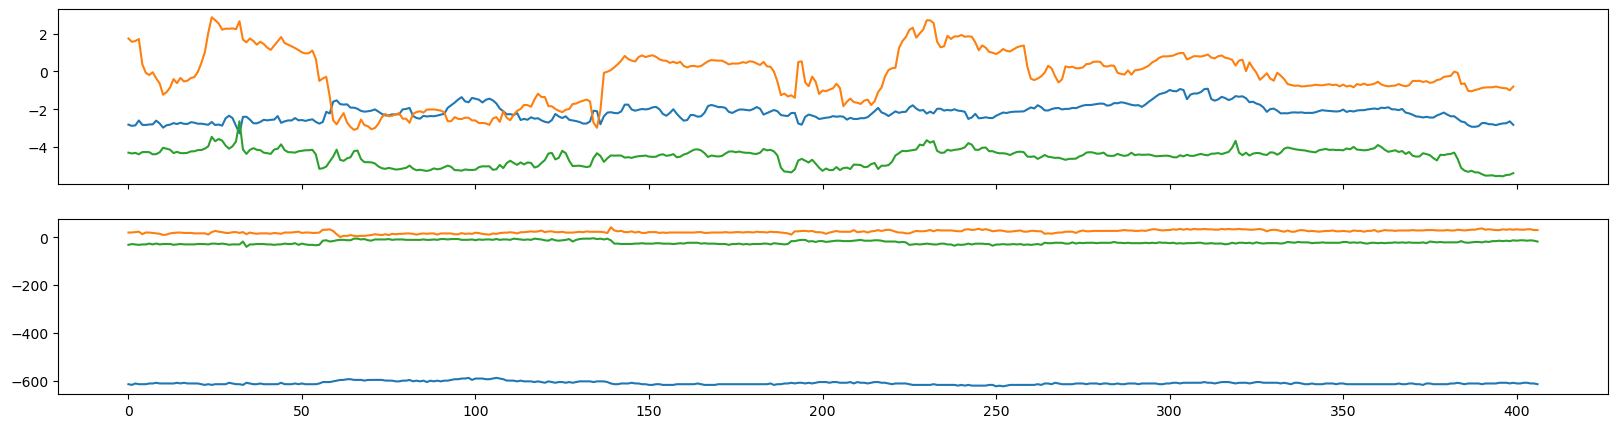

In [2]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(2, 1, figsize = (20, 5), sharex=True)
ax[0].plot(mag_data['B3GSE'])
ax[1].plot(proton_data['P_VELS'])

In [3]:
from astropy import units as u

u.set_enabled_aliases({'sec': u.s, '#': u.dimensionless_unscaled})

from datetime import timedelta
import spcphys_common_functions as scf

time_window_ranges, time_window_indices = scf.time_window.slide_time_window(time=scf.preprocess._npdt64_to_dt(proton_data['Epoch'].values), window_size=timedelta(seconds=90), step=timedelta(seconds=3), start_time=TIME_RANGE[0])
time_window_mids = [time_window_range[0] + (time_window_range[1] - time_window_range[0]) / 2 for time_window_range in time_window_ranges]
alfven_params = scf.alfvenic_parameters.calc_alfven(p_date=scf.preprocess._npdt64_to_dt(proton_data['Epoch'].values), 
                                                    v=proton_data['P_VELS'].values * u.Unit(proton_data['P_VELS'].units), 
                                                    n=proton_data['P_DENS'].values * u.cm**-3, 
                                                    b_date=scf.preprocess._npdt64_to_dt(mag_data['Epoch3'].values), 
                                                    b=mag_data['B3GSE'].values * u.nT, 
                                                    time_window_ranges=time_window_ranges,)


(0.0, 1.0)

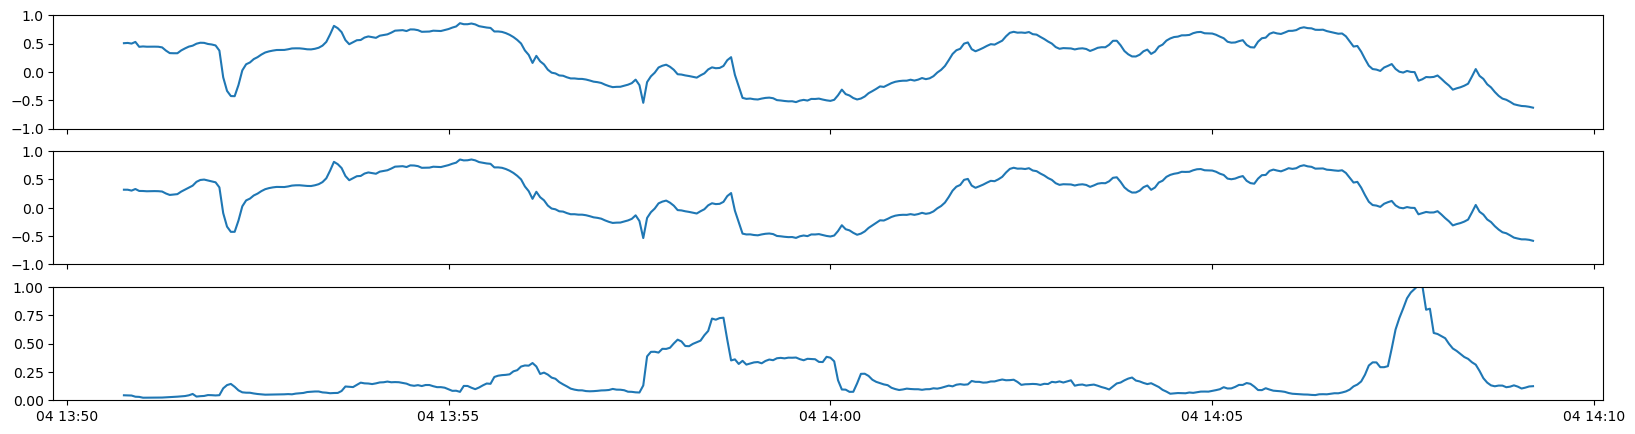

In [11]:
fig, ax = plt.subplots(3, 1, figsize = (20, 5), sharex=True)

ax[0].plot(time_window_mids, alfven_params['r3'])
ax[0].set_ylim(-1, 1)
ax[1].plot(time_window_mids, alfven_params['cross_helicity'])
ax[1].set_ylim(-1, 1)
ax[2].plot(time_window_mids, alfven_params['compressibility'])
ax[2].set_ylim(0, 1)

微妙的区别可能在于插值的方法？此处插值为先计算dva后从插值到质子时间点